<a href="https://colab.research.google.com/github/LiangChen518/-/blob/main/Abalone_Age_Analysis_and_Model_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Abalone Age Analysis and Model Predict




## Overview

### Abalone comercial value

Abalone has great commercial values.Usually, the price of abalone is decided by its age. The older the abalone are, the more commercial values they usually have. By identifying the abalone's age correctly, the farmers can sale the abalones in a fair price and customer can make better decision about whether does the abalone worth the price.

### Overfarming ->Knowing the age helps solving the problem

It also offers value for management of the abalone farming. Knowing more about the correct age of the abalone gives more information about the current situation of the abalone farm. Overfarming abalones is not healthy for the environment and the sustainable development of the farm. It would be hard to tell if the farm is overfarmed or not without knowing the correct ages of the abalones.


### Measure Rings to get age -> Rings = ages+1.5 
The age of the abalone is usually caculated by counting rings and then plus 1.5. This usually requires to kill the abalone,get the shell and then count the rings under microscope. There are studies in biology trying to get precise ages from test the amount of a specific element. In order to get the correct age of abalone without harming the abalone, the method of machine learning get in the way. By using other characteristic that is easy to measure like the weight, length and diameter, the model is going to give a prediction of the ages of the abalones. 

#Project Proposal
Title: Exploring the relationship between abalone rings and other characteristics

## Initial Questions

1. What is the ring of the abalone based on other variables in dataset
2. Which model can best predict the ring of abalone? 
 


## Motivations

1)  Predict abalones ages with other characteristics of abalones

2) Compare and get the best modeling method

3) Get the variable that is affect the age of abalone the most


## Data Source
https://www.kaggle.com/rodolfomendes/abalone-dataset 



##Related Work

Growth of the European abalone (Haliotis tuberculata L.) in situ: Seasonality and ageing using stable oxygen isotopes

https://www-sciencedirect-com.ezproxy.um.edu.my/science/article/pii/S1385110110001218

Abalone Age Prediction Problem: A Review

https://www.ijcaonline.org/archives/volume178/number50/mehta-2019-ijca-919425.pdf

Prediction of Abalone Age Using Regression-Based Neural Network

https://ieeexplore-ieee-org.ezproxy.um.edu.my/document/8970983 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the data

data = pd.read_csv('/content/abalone_preprocessed_data.csv')

# getting the shape
data.shape

(4024, 10)

In [ ]:
print(data)

      Unnamed: 0 sex  length  ...  viscera_weight  shell_weight  rings
0              1   M   0.455  ...          0.1010        0.1500     15
1              2   M   0.350  ...          0.0485        0.0700      7
2              3   F   0.530  ...          0.1415        0.2100      9
3              4   M   0.440  ...          0.1140        0.1550     10
4              5   I   0.330  ...          0.0395        0.0550      7
...          ...  ..     ...  ...             ...           ...    ...
4019        4020   F   0.565  ...          0.2390        0.2490     11
4020        4021   M   0.590  ...          0.2145        0.2605     10
4021        4022   M   0.600  ...          0.2875        0.3080      9
4022        4023   F   0.625  ...          0.2610        0.2960     10
4023        4024   M   0.710  ...          0.3765        0.4950     12

[4024 rows x 10 columns]


In [ ]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
print(data)

     sex  length  diameter  ...  viscera_weight  shell_weight  rings
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4019   F   0.565     0.450  ...          0.2390        0.2490     11
4020   M   0.590     0.440  ...          0.2145        0.2605     10
4021   M   0.600     0.475  ...          0.2875        0.3080      9
4022   F   0.625     0.485  ...          0.2610        0.2960     10
4023   M   0.710     0.555  ...          0.3765        0.4950     12

[4024 rows x 9 columns]


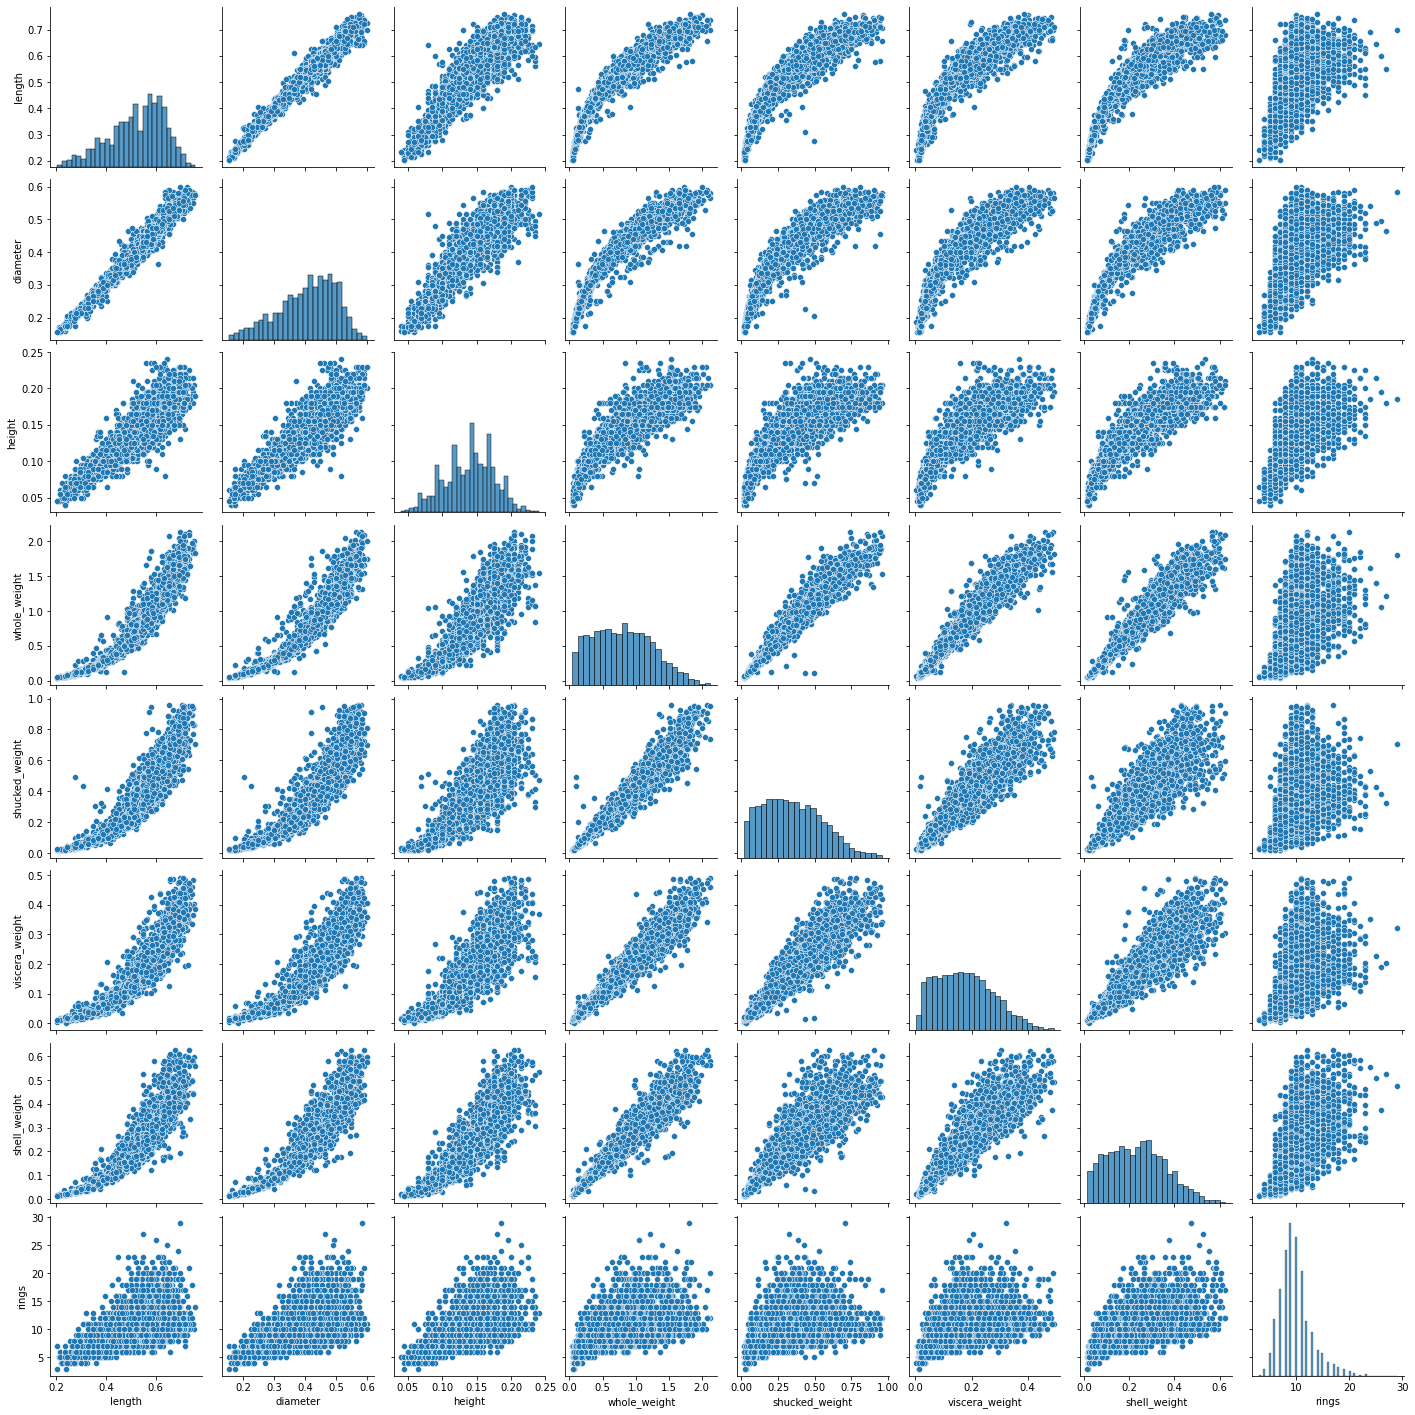

In [ ]:
# pairplot 
import seaborn as sns
sns.pairplot(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4024 non-null   int8   
 1   length          4024 non-null   float64
 2   diameter        4024 non-null   float64
 3   height          4024 non-null   float64
 4   whole_weight    4024 non-null   float64
 5   shucked_weight  4024 non-null   float64
 6   viscera_weight  4024 non-null   float64
 7   shell_weight    4024 non-null   float64
 8   rings           4024 non-null   int64  
dtypes: float64(7), int64(1), int8(1)
memory usage: 255.6 KB


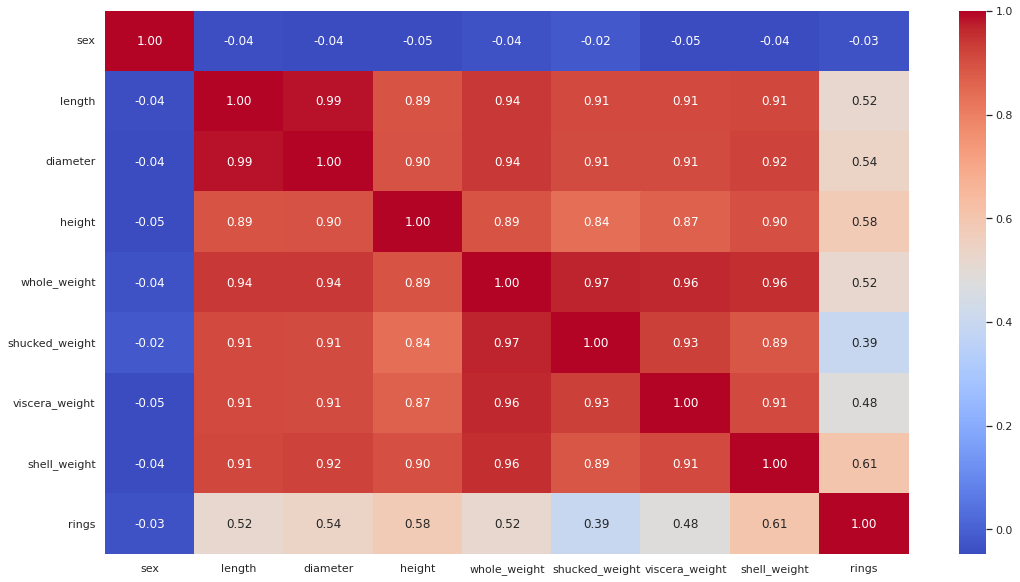

In [ ]:
sns.set()
sns.set_style('whitegrid',{"font.sans-serif":["simhei","Arial"]})
# in the dataset,the type of the data are all object,so thet can not be proceessed to heatmap
# we need to transform the tpye from the object to int and float  
for transform in ["sex"]:
  data[transform]=data[transform].astype("category").cat.codes
data["length"] = pd.to_numeric(data["length"],errors="coerce")
data["diameter"] = pd.to_numeric(data["diameter"],errors="coerce")
data["height"] = pd.to_numeric(data["height"],errors="coerce")
data["whole_weight"] = pd.to_numeric(data["whole_weight"],errors="coerce")
data["shucked_weight"] = pd.to_numeric(data["shucked_weight"],errors="coerce")
data["viscera_weight"] = pd.to_numeric(data["viscera_weight"],errors="coerce")
data["shell_weight"] = pd.to_numeric(data["shell_weight"],errors="coerce")
data["rings"] = pd.to_numeric(data["rings"],errors="coerce")
data.info()
#After transform, we can do the correlation of the data.
import matplotlib.pyplot as plt
import seaborn as sns
data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap="coolwarm")
#Each number is a correlation coefficient, and each coefficient represents the relationship between two variables. 
#When the coefficient is closer to 1, it means that the two variables are more related to each other.
#When the coefficient is closer to 0, it means that the two variables are less related to each other.

In [ ]:
# checkig the values of sex 

data['sex'].value_counts()

2    1466
1    1287
0    1271
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rings vs length and sex')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


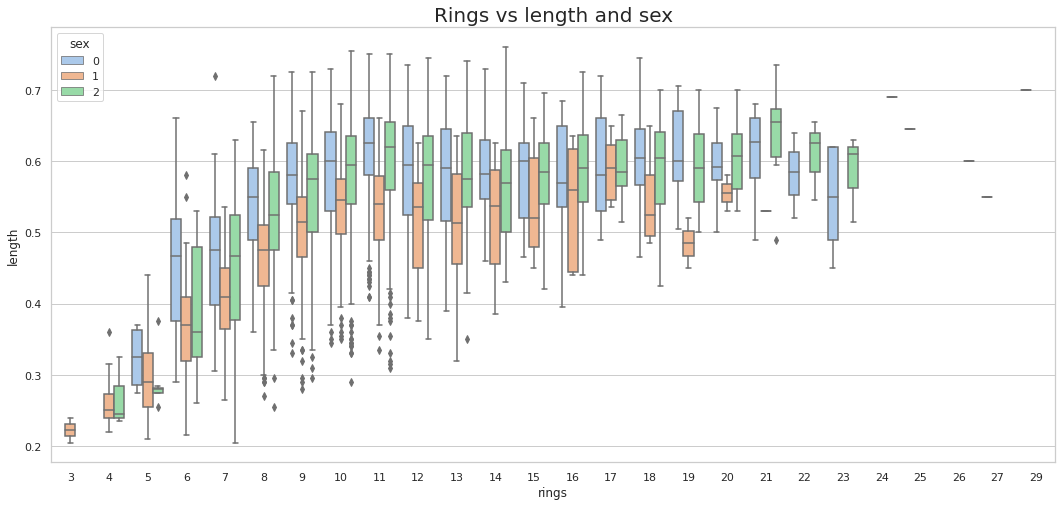

In [ ]:
# plotting a hue plot 

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(data['rings'], data['length'], hue = data['sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

#Inboxplot

#The role of the median: it reflects the central tendency of a set of data.
#A high median indicates a higher mean; a low median indicates a lower mean;

#The role of quartiles: The difference between quartiles can reflect the dispersion of a set of data.
#A short box indicates that the data is concentrated; a long box indicates that the data is scattered.

#The location of the median in the box:
#If it is in the middle, the data is normally distributed;
#If it is closer to the top of the box, the data is left-skewed;
#If it is closer to the bottom of the box, the data is right-skewed.

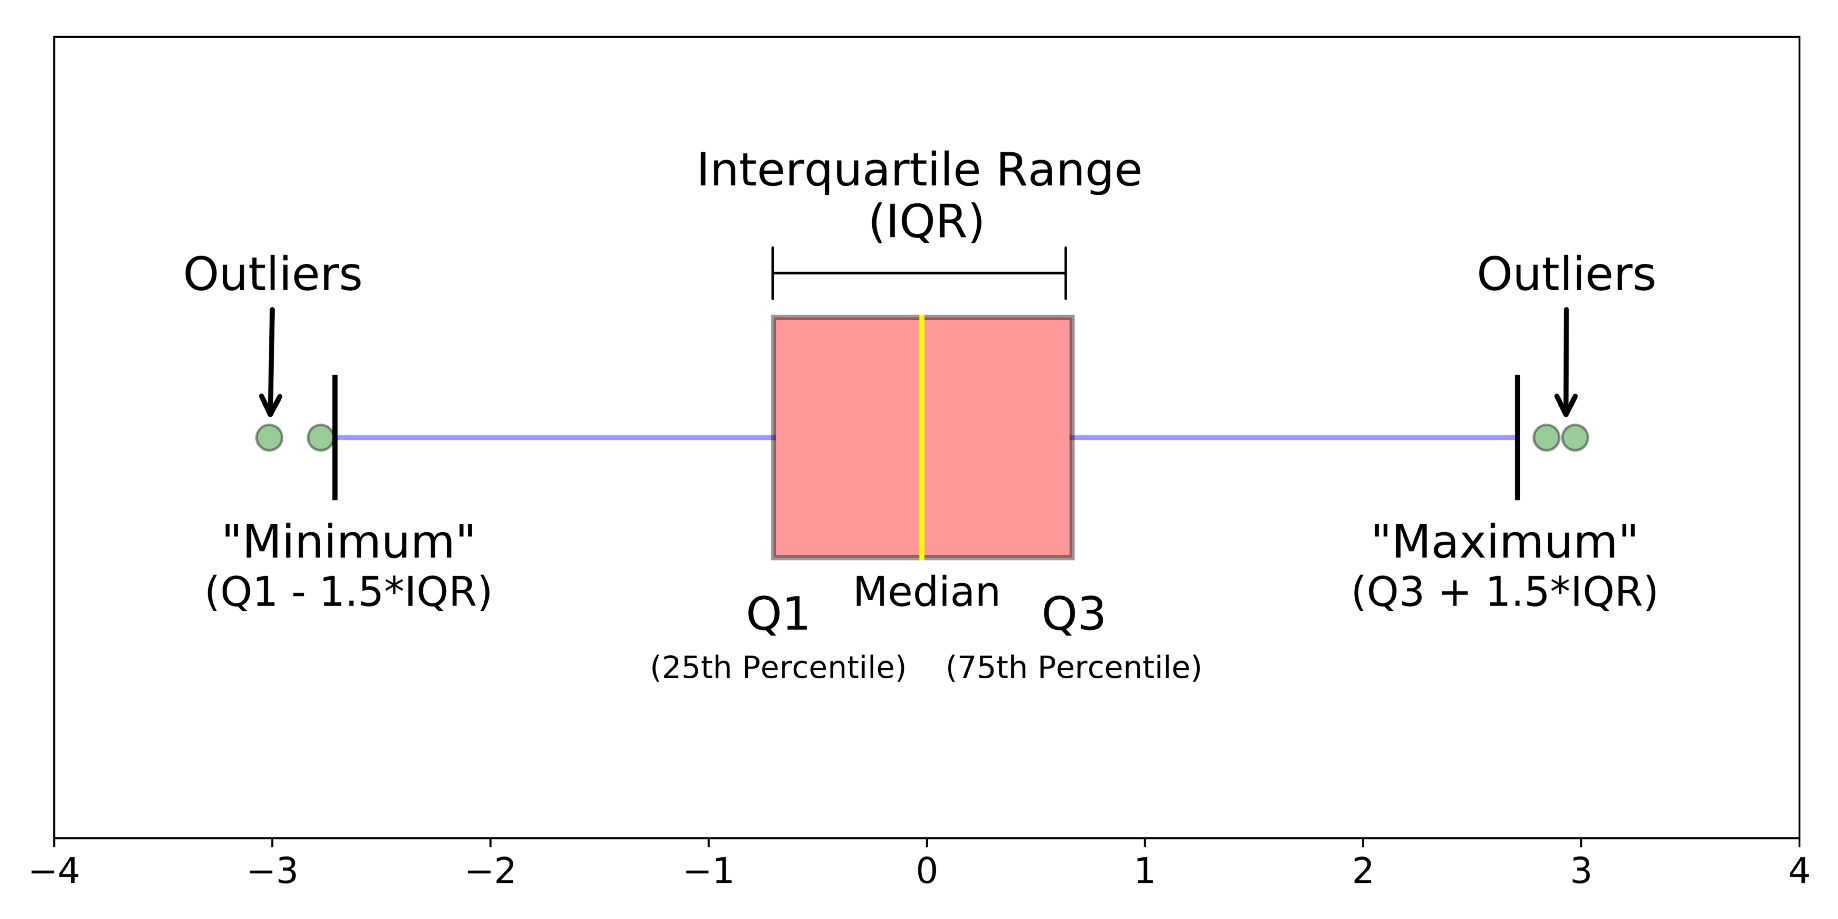

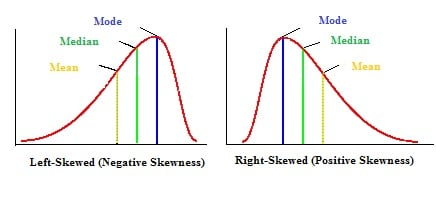

To explore the relationship of rings and diameter, a vivolinplot is ploted. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rings vs diameter and sex')

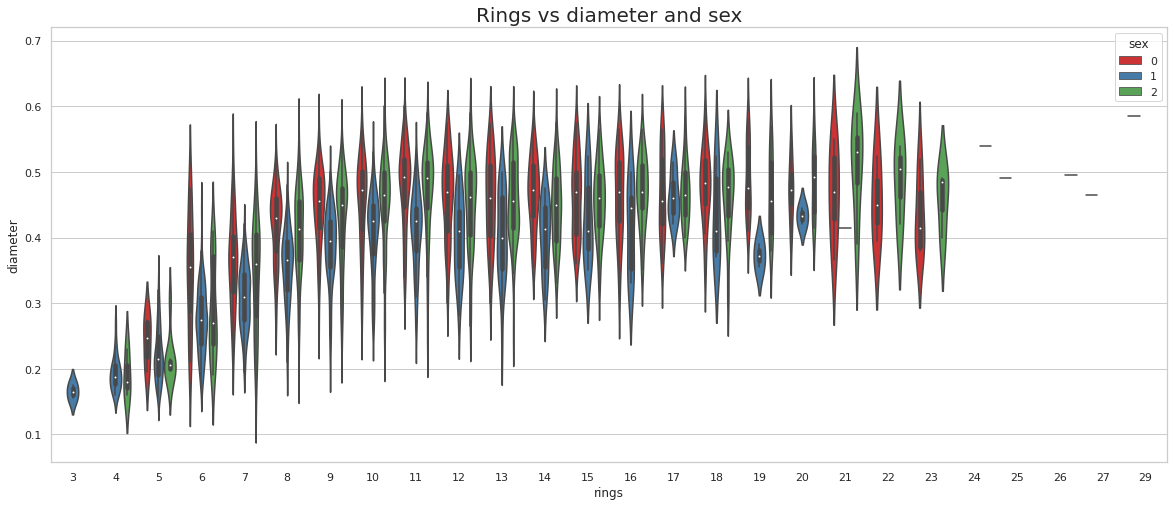

In [ ]:
# rings vs diameter and sex 

plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(data['rings'], data['diameter'], hue = data['sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)
#The result shows that:
#1.The abalone's diameter and rings has a positive correlation
#2 Gender I has less diameter than other 2 gender at certain rings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rings vs height and sex')

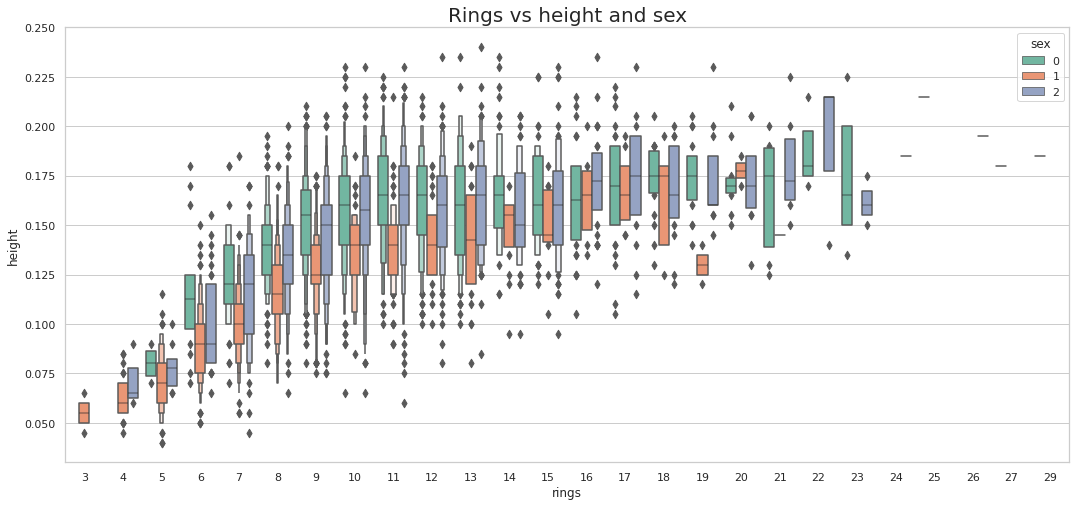

In [ ]:
# rings vs height and sex 

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(data['rings'], data['height'], hue = data['sex'], palette = 'Set2')
plt.title('Rings vs height and sex', fontsize = 20)

#This plot tells us
#1. The height of abalone does not has a large difference between each other
#2. Sex I ablone tends to have less diameter than the other two sex at a certain age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

Text(0.5, 1.0, 'Rings vs weight')

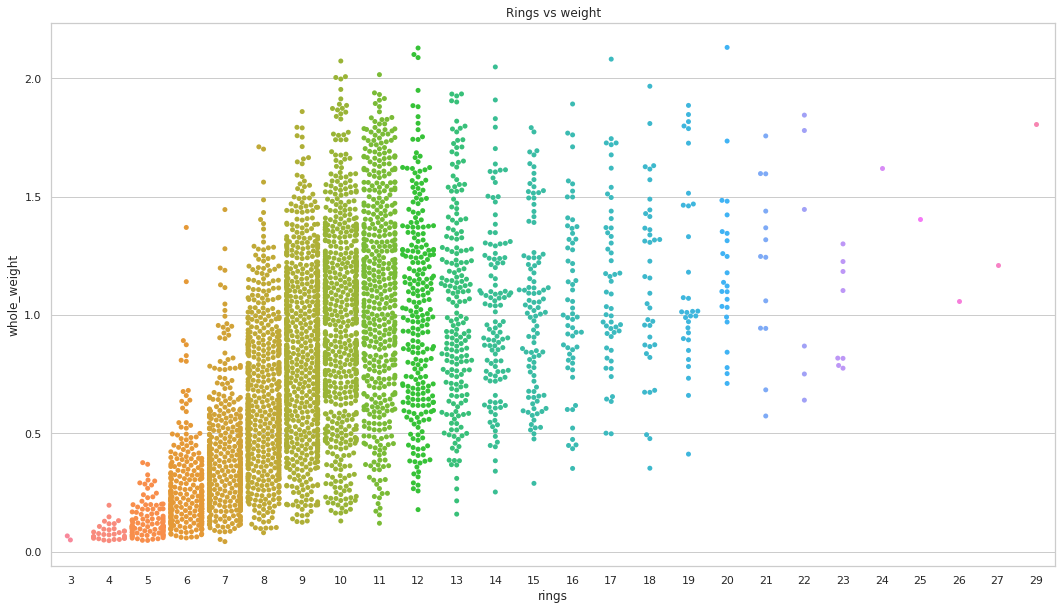

In [ ]:
# ring vs weight 

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(data['rings'], data['whole_weight'])
plt.title('Rings vs weight')

#The plot shows that
# 1. The ring and the weight of abalone has a positive correlationship
# 2. With higher whole weight value, the ring of abalone is increasing
# 3. It's hard to tell the ring with the whole weight, because at a certain ring value, the whole weight of different abalones vary a lot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

Text(0.5, 1.0, 'Rings vs shucked weight')

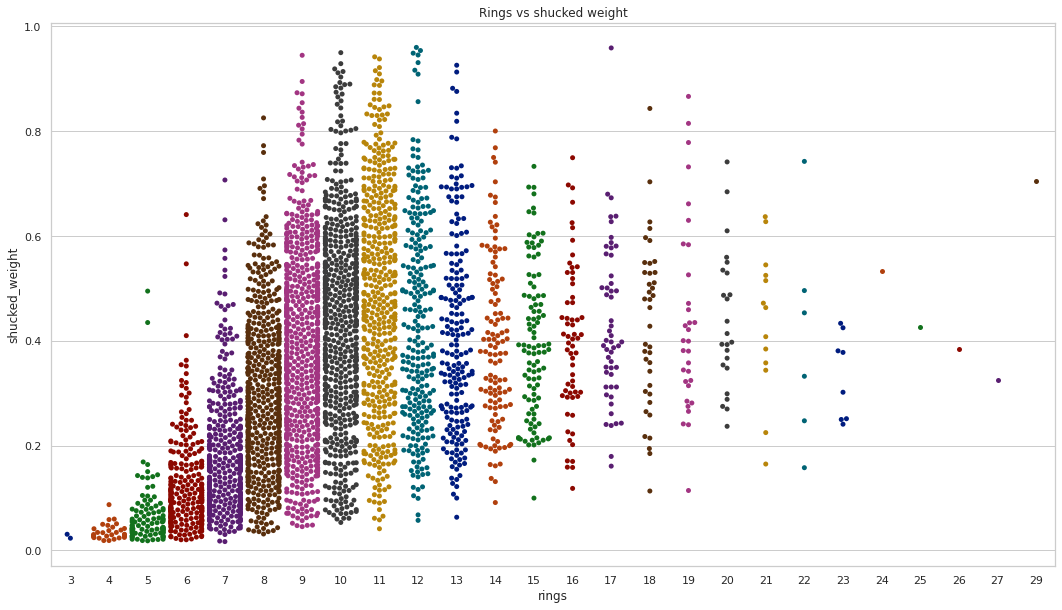

In [ ]:
# ring vs shucked weight 

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(data['rings'], data['shucked_weight'], palette = 'dark')
plt.title('Rings vs shucked weight')

# shucked weight - abalones weight without shells
# the results shows that:
# 1. the abalones with rings lower than 6 (younger) tend to have lower shucked weight
# 2. most of the abalones with higher shucked weight contains rings ranging from 9-13 rings with some abalones around 17-19 rings
# 3. as the number of the rings increase, the number of abalones with high shucked weight decrease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rings vs Viscera Weight')

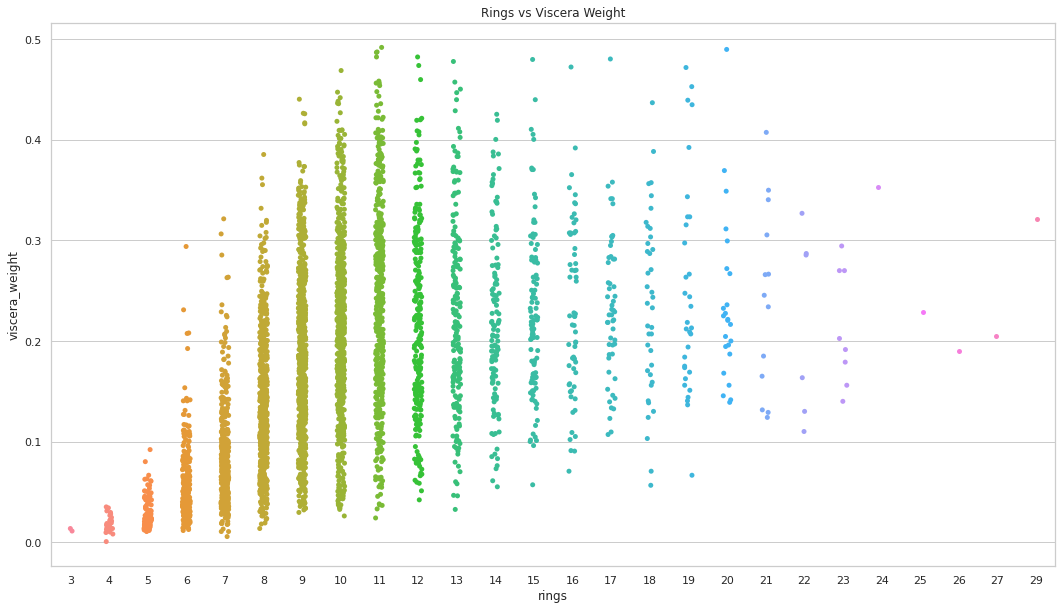

In [ ]:
# ring vs viscera weight 

plt.rcParams['figure.figsize'] = (18, 10)
sns.stripplot(data['rings'], data['viscera_weight'])
plt.title('Rings vs Viscera Weight')

# viscera weight - gut weight
# the results shows that:
# 1. the abalones with rings lower than 6 (younger) tend to have lower viscera weight
# 2. most of the abalones with higher viscera weight which is above 0.4; contains rings ranging from 9-13 rings
# 3. and the no. of abalones with high viscera weight decrease when the number of rings increase

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rings vs Shell weight')

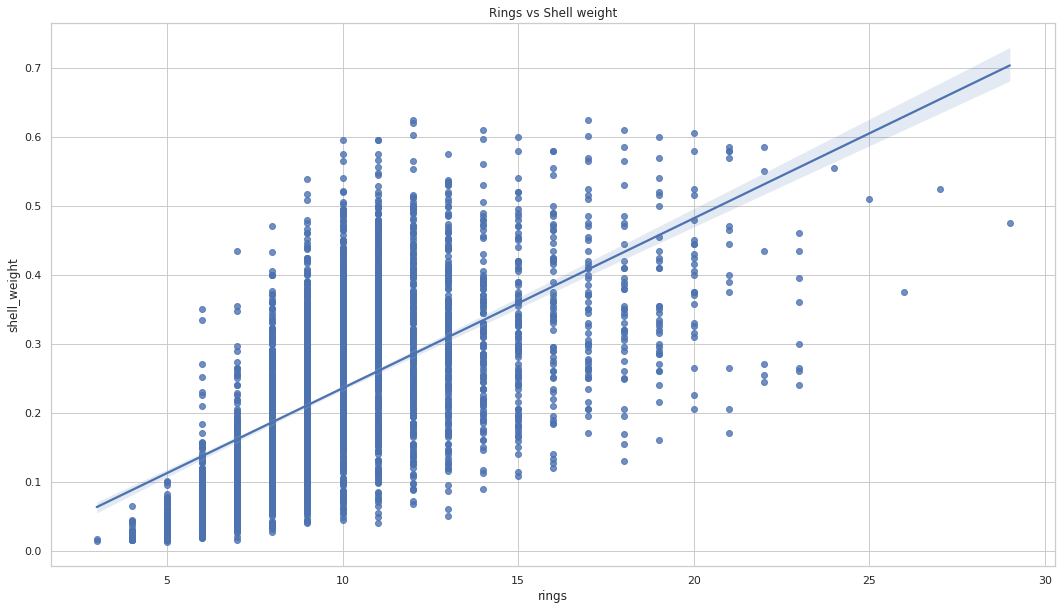

In [ ]:
# ring vs shell weight  

plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(data['rings'], data['shell_weight'])
plt.title('Rings vs Shell weight')

# the results shows that:
# 1. the linear regression plot shows a positive slope
# 2. the abalones with rings less than 5 tend to have lower shell weight
# 3. the shell weight does not have much changes after the 10 rings

In [ ]:
data.head()
# These code shows the first few line of the dataset

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data = pd.get_dummies(data)
#This line of codeConvert categorical variable into dummy/indicator variables.

In [ ]:
# 'sex' column was converted into three categories
data.head()
#This line shows the result of conversion

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [ ]:
# splitting the dependent and independent variablesQ

y = data['rings']
data = data.drop(['rings'], axis = 1)
x = data
from sklearn.preprocessing import normalize
x = normalize(x,norm='l2')
print(x)
# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

[[0.34932142 0.28022488 0.07293524 ... 0.         0.         0.76773938]
 [0.31071821 0.23525808 0.07989897 ... 0.         0.         0.88776632]
 [0.3689312  0.29236057 0.09397304 ... 0.6960966  0.         0.        ]
 ...
 [0.32236191 0.25520318 0.11014032 ... 0.         0.         0.53726985]
 [0.34488943 0.2676342  0.08277346 ... 0.55182308 0.         0.        ]
 [0.26975439 0.21086435 0.07408747 ... 0.         0.         0.37993576]]
Shape of x: (4024, 10)
Shape of y: (4024,)


In [ ]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3219, 8)
Shape of x_test : (805, 8)
Shape of y_train : (3219,)
Shape of y_test : (805,)


In [ ]:
# MODELLING 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

model = RandomForestClassifier()
model1 = LinearRegression()
model2 = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model3 = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(10, 2), random_state=1)
model4 = GaussianNB()
model5 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

model.fit(x_train, y_train)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
mse5 = mean_squared_error(y_test, y_pred5)
rmse5 = np.sqrt(mse5)

# r2 score
r2 = r2_score(y_test, y_pred)
r21 = r2_score(y_test, y_pred1)
r22 = r2_score(y_test, y_pred2)
r23 = r2_score(y_test, y_pred3)
r24 = r2_score(y_test, y_pred4)
r25 = r2_score(y_test, y_pred5)

print("random forest classifier")
print("RMSE :", rmse)
print("R2 Score :", r2)

print("\nlinear regression")
print("RMSE :", rmse1)
print("R2 Score :", r21)

print("\nsvm.svr")
print("RMSE :", rmse2)
print("R2 Score :", r22)

print("\nneural network")
print("RMSE :", rmse3)
print("R2 Score :", r23)

print("\nnaive bayes")
print("RMSE :", rmse4)
print("R2 Score :", r24)

print("\ndecision tree")
print("RMSE :", rmse5)
print("R2 Score :", r25)

random forest classifier
RMSE : 2.641051926695707
R2 Score : 0.31630450566005774

linear regression
RMSE : 2.2769464518820692
R2 Score : 0.4918236237197461

svm.svr
RMSE : 2.2750123939687334
R2 Score : 0.49268655584855936

neural network
RMSE : 3.341439419068427
R2 Score : -0.09439984027202164

naive bayes
RMSE : 3.732682581556914
R2 Score : -0.3656863160314858

decision tree
RMSE : 2.635457272950654
R2 Score : 0.3191980407295204


**model = RandomForestClassifier()**  
*#Assign the randomforest function to model*

**model.fit(x_train, y_train)**  
*#Fit the training data to the model*

**y_pred = model.predict(x_test)**  
*#Assign the independent variable of testing data to the model to predict the resluts of the dependent variables.*

**mse = mean_squared_error(y_test, y_pred)**  

*#Asssign the independent variable of testing data and the results of the predicting to the mean_squared_error() function to check the error.*

**r2 = r2_score(y_test, y_pred)**  

*#The closer the R2 score to 1 ,the more accute the results of the predicting are,the closer the r2 is to 0 , the closer the results are to the mean，which indicates less accurate.*

In [ ]:
# import library from scikit learn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# define linear regression as model1
model1 = LinearRegression()
model1.fit(x_train,y_train)

# predict the training model on x test
y_pred1 = model1.predict(x_test)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test, y_pred1)
print("linear regression")
print("MSE :", mse1)
print("RMSE :", rmse1)
print("R2 Score :", r21)

linear regression
MSE : 5.184485144738344
RMSE : 2.2769464518820692
R2 Score : 0.4918236237197461


In [ ]:
data = {'y':y_test,'pred':y_pred1}
df = pd.DataFrame(data)
df.head()
# data shown that the actual value is quite close to the predicted value
# hence the graph is well-fitted

,y,pred
1493,7,7.376411
2588,10,10.481110
891,6,9.132333
1952,14,14.023514
87,15,10.060687


In [ ]:
from sklearn import svm 
model2 = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model2.fit(x_train,y_train)
#This function produce the predict value
y_pred2 = model2.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred2)
print("support vendor regression")
print("MSE :", mse2)
print("RMSE :", rmse2)
print("R2 Score :", r22)


support vendor regression
MSE : 5.175681392711347
RMSE : 2.2750123939687334
R2 Score : 0.49268655584855936


To evaluate RMSE value, there is not a certain range for good RMSE value. The evaluation is depended on different variables. Because the ring of abalone is between 1-30 so 2.22 is not quite a very good result. 


The best result of R2 value is 1. In this case, 0.54 is not a very good value.

In [ ]:
data = {'y':y_test,'pred':y_pred2}
df = pd.DataFrame(data)
df.head()
#this blocks shows the result sample of the svm model
#The predict result is +-1 around the actual rings

,y,pred
1493,7,6.881985
2588,10,10.458608
891,6,8.264535
1952,14,12.606646
87,15,10.093472


In [ ]:

from sklearn.neural_network import MLPClassifier
# hidden_layer_sizes(n, default) - nth element represents the no. of neurons
# in the ith hidden layer
# solver = 'lbfgs' - is an optimizer in the family of quasi-Newton methods
model3 = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(10, 2), random_state=1)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, y_pred3)
print("neural network")
print("MSE :", mse3)
print("RMSE :", rmse3)
print("R2 Score :", r23)

neural network
MSE : 11.165217391304347
RMSE : 3.341439419068427
R2 Score : -0.09439984027202164


In [ ]:
data = {'y':y_test,'pred':y_pred3}
df = pd.DataFrame(data)
df.head()
# data shown that the predicted value is far from the predicted value
# the graph could likely be underfitted

,y,pred
1493,7,9
2588,10,9
891,6,9
1952,14,9
87,15,9


In [ ]:
!pip install eli5 

     |████████████████████████████████| 106 kB 4.2 MB/s 


eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance”

In [ ]:
# let's check the importance of each 


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Sex_F','Sex_I','Sex_F'])

Weight,Feature
0.0419 ± 0.0293,Shell weight
0.0270 ± 0.0216,Shucked weight
0.0234 ± 0.0088,Whole weight
0.0175 ± 0.0172,Viscera weight
0.0172 ± 0.0062,Length
0.0163 ± 0.0130,Diameter
0.0148 ± 0.0101,Sex_I
0.0077 ± 0.0127,Height
0.0022 ± 0.0055,Sex_F
0.0002 ± 0.0094,Sex_F


#Future work
1.Find more data with good quality to test the model

2.Improve the current model to produce better result

3.The number of rings on the abalone represents the age of the abalone, and the older the abalone, the more economical it is. In the future, abalone breeders can use Shell weight to predict the number of rings of abalone, so as to know the age of abalone. This is a very simple and quick method for both farmers and customers. This allows people to judge the economic value of abalone more quickly.In the future, we can also predict the value of abalone of different ages based on the market price and age of abalone.
